## Flow chart for the clustering algorithm

In [13]:
from graphviz import Digraph

dot = Digraph('Algortihm for Clustering', node_attr={'style': 'filled'})

# Adjusting Paremeters of the graph
# Add a title
dot.attr(label='Algortihm for Clustering \n\n', 
         labelloc='t',
         fontsize='30',      # Adjust this for size
         fontcolor='black',    # Adjust this for color
         labeljust='c',      # Centered; use 'l' for left and 'r' for right
        )

# Define the direction of the flow ('TB' Top-Bottom or 'LR' Low-Right) 
dot.attr(rankdir='TP')

# Adjust Node Spacing
dot.attr(ranksep='1')

# Setting colors for nodes
dot.node('A', 'Initial locations of \n cluster heads', shape='box', fillcolor='lightblue', fontcolor='black', color='black')
dot.node('B', 'Find boundaries \n beteen clusters', shape='box', fillcolor='lightblue')
dot.node('C', 'Compute square residual (D) \n between data points \n and clusters (distance)', shape='box', fillcolor='lightblue')

# Conditional diamond node
dot.node('D', 'Is residual (D) < E \n (epsilon --> tolerance)', shape='diamond', fillcolor='lightpink')

# Paths based on condition
dot.node('D1', 'Stop', shape='box', fillcolor='lightblue')
dot.node('D2', 'Set  k = k + 1 (number of iterations) \n and find new cluster (centroids).', shape='box', fillcolor='lightcoral')

# Setting colors for edges
dot.edge('A', 'B')
dot.edge('B', 'C')
dot.edge('C', 'D')
dot.edge('D', 'D1', label='Yes')
dot.edge('D', 'D2', label='No')
dot.edge('D2', 'A', label='Start again')  # Looping back edge

#dot.render('analytics_flowchart', format='png', view=True)

## Datapoints 

X = [[ 2  3]
 [ 6  6]
 [ 7  8]
 [ 8  7]
 [ 9  7]
 [10 10]] 
 of shape: (6, 2)


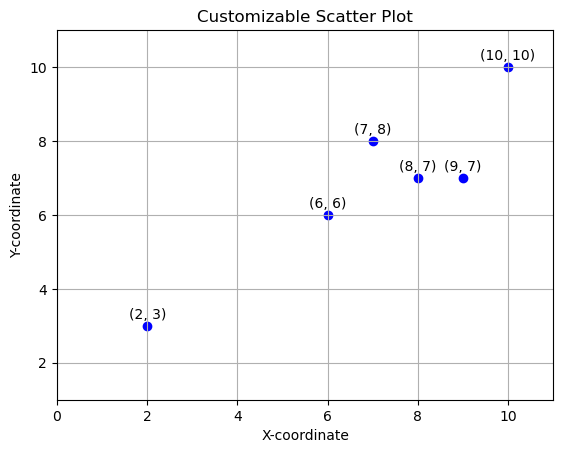

In [14]:
import numpy as np 
import matplotlib.pyplot as plt
import visualize_data

# Datapoints
X = np.array(([2,3],[6,6],[7,8],[8,7],[9,7],[10,10]))

print(f'X = {X} \n of shape: {X.shape}')

visualize_data.plot_data(X)

## Cluster initialization

[[7 7]
 [9 9]] (2, 2)


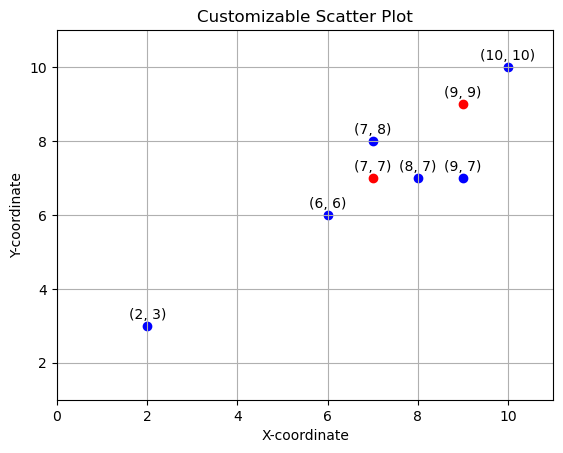

In [15]:
# 1st initial cluster = Average of datapoints 
CH = np.zeros((1,2))
CH[0] = np.round(np.mean(X, axis=0))
CH = CH.astype(int) # For eliminate the ".0" in the graph

# Define the tolerance E 
E = 2

# Next Cluster using adding the E
CH = np.vstack((CH, CH[CH.shape[0]-1] + E))

# Sort cluster array
CH = np.sort(CH, axis=0)
print(CH, CH.shape)

visualize_data.plot_data(X, CH=CH, show_CHs=True)


## Computing Square Residual (D)

### Flow chart for the clustering addition process

In [16]:
from graphviz import Digraph

dot = Digraph('Cluster Update Process', 
              node_attr={'style': 'filled',
                         'shape': 'box',
                         'fillcolor':'lightblue',  
                         'fontcolor': 'black', 
                         'color': 'black'}, 
              engine='circo', 
              )

# Adjusting Paremeters of the graph
dot.attr(label='Cluster Update Process \n\n', 
        labelloc='t',
        fontsize='30',
        fontcolor='black',
        labeljust='c', 
        rankdir='TP',
        ranksep='1')

# Setting the nodes
dot.node('A', 'Find the boundaries \n between the innitial \n clusters')
dot.node('B', 'Group clusters with their \n corresponding datapoints')
dot.node('C', 'Compute square \n residual (D) \n between data points \n and clusters')
dot.node('D', 'Compute the new cluster \n positions based \n on the  average distance \n of their points')
dot.node('E', 'Find the boundaries \n between the updated \n clusters')

# Conditional diamond node
#dot.node('D', 'Is residual (D) < E \n (epsilon --> tolerance)', shape='diamond', fillcolor='lightpink')

# Paths based on condition
#dot.node('D1', 'Stop', shape='box', fillcolor='lightblue')
#dot.node('D2', 'Set  k = k + 1 (number of iterations) \n and find new cluster (centroids).', shape='box', fillcolor='lightcoral')

# Setting colors for edges
dot.edge('A', 'B')
dot.edge('B', 'C')
dot.edge('C', 'D')
dot.edge('D', 'E', label='Start again')  # Looping back edge
dot.edge('E', 'B')

# dot.edge('D', 'D1', label='Yes')
# dot.edge('D', 'D2', label='No')
# dot.edge('D2', 'A', label='Start again')  # Looping back edge

#dot.render('clustes_update_process', format='png', view=True)

### Computing


!!!!! Finding Boundaries... !!!!!


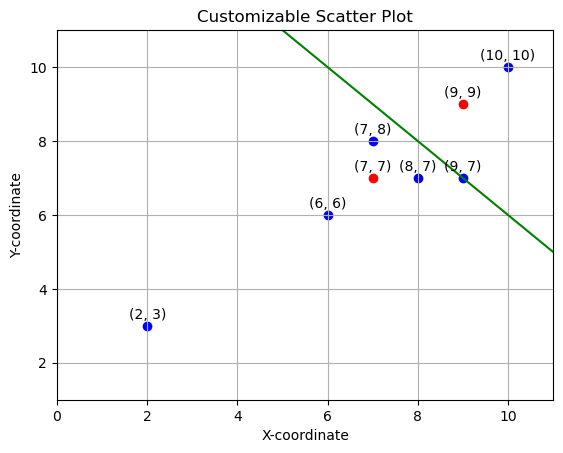

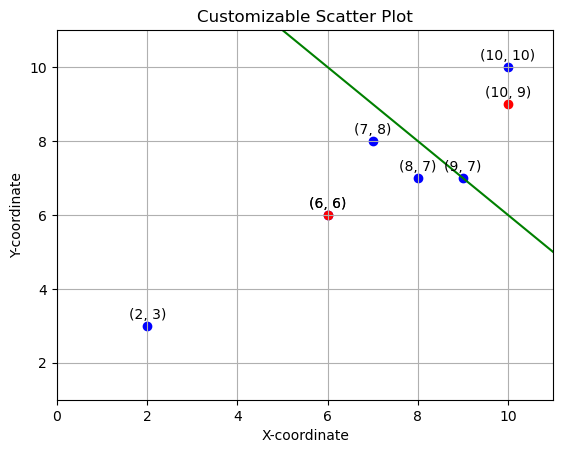

count: -2, D_new: 51.0, D = 0, CHs: [[ 6  6]
 [10  9]]

!!!!! Finding Boundaries... !!!!!


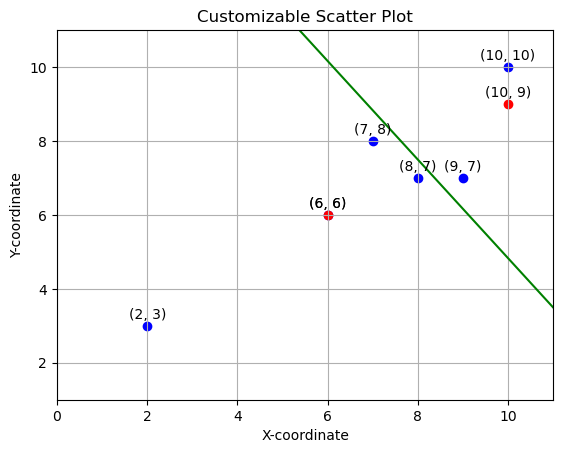

count: -1, D_new: 41.0, D = 51.0, CHs: [[ 6  6]
 [10  9]]
The farest node [2 3] has a distance of 5.0 to the cluster [6 6]
The average distance from the nodes to this cluster is 2.368033988749895
newCH = [4. 4.], last_CH = [6 6]

!!!!! Finding Boundaries... !!!!!


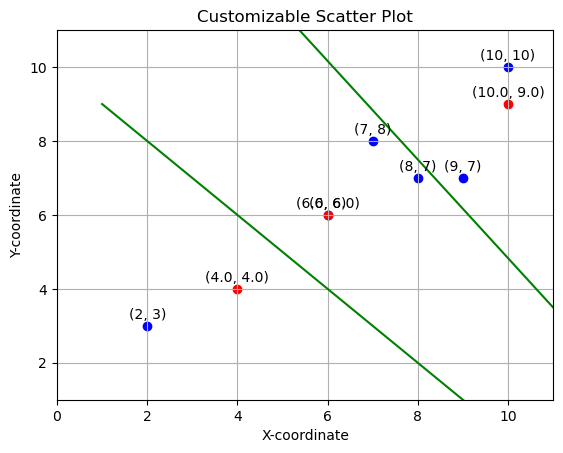

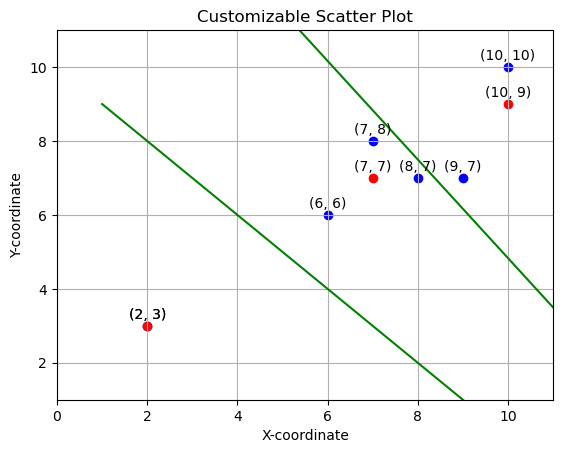

count: 0, D_new: 21.0, D = 41.0, CHs: [[ 4.  4.]
 [ 6.  6.]
 [10.  9.]]
The farest node [9 7] has a distance of 2.23606797749979 to the cluster [10  9]
The average distance from the nodes to this cluster is 1.618033988749895

!!!!! Finding Boundaries... !!!!!


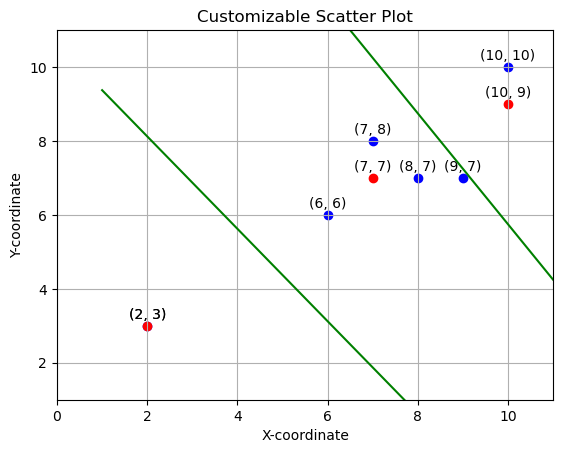

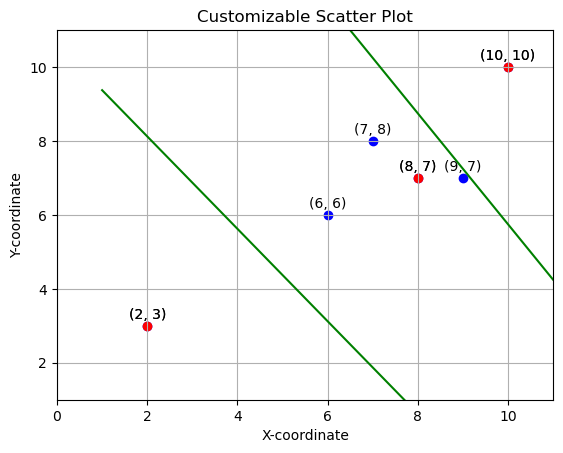

count: 1, D_new: 9.0, D = 21.0, CHs: [[ 2  3]
 [ 7  7]
 [10  9]]
The farest node [6 6] has a distance of 2.23606797749979 to the cluster [8 7]
The average distance from the nodes to this cluster is 1.1625703849682212

!!!!! Finding Boundaries... !!!!!


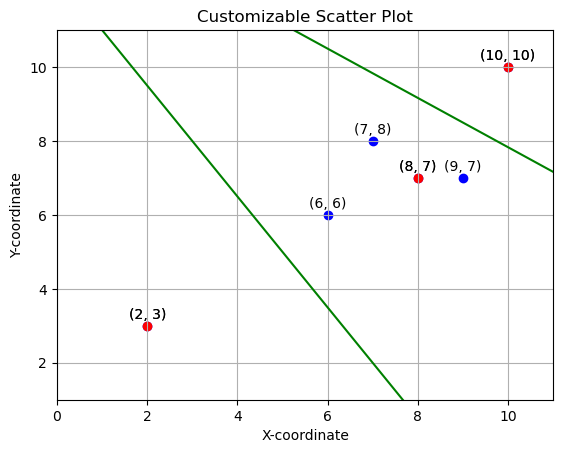

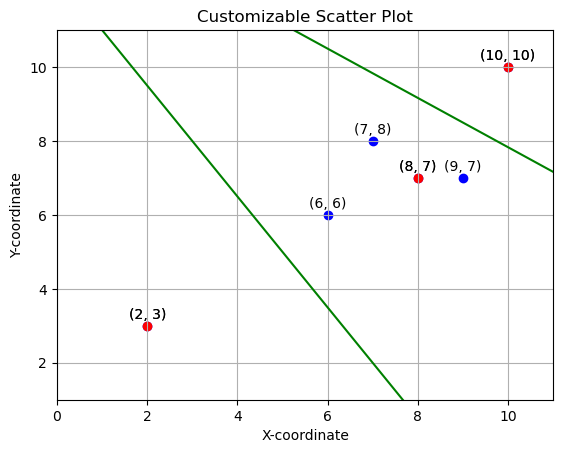

count: 2, D_new: 8.0, D = 9.0, CHs: [[ 2  3]
 [ 8  7]
 [10 10]]
The farest node [6 6] has a distance of 2.23606797749979 to the cluster [8 7]
The average distance from the nodes to this cluster is 1.1625703849682212

!!!!! Finding Boundaries... !!!!!


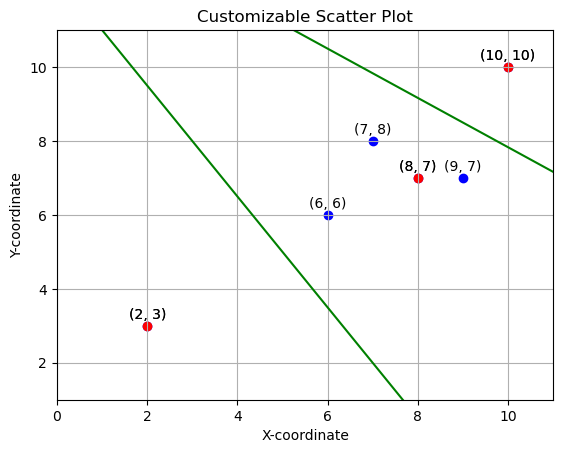

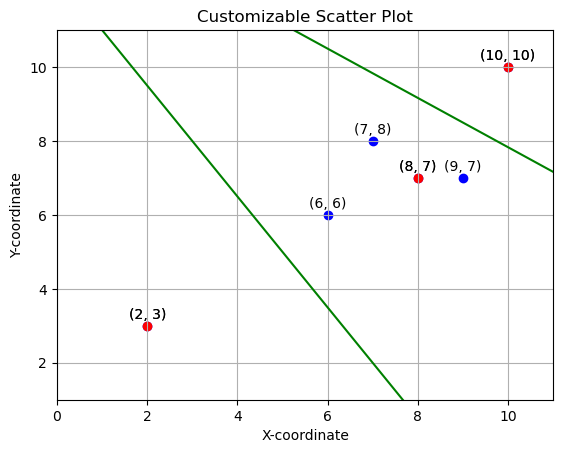

count: 3, D_new: 8.0, D = 8.0, CHs: [[ 2  3]
 [ 8  7]
 [10 10]]


In [17]:
import utils

# !!!! INITIAL STAGE !!!!

D = 0

# Step 1: Find the boundaries for the given CHs
boundaries_points, boundaries_lines_m, boundaries_lines_b = utils.find_boundaries(X, CH)

# Step 2: -Compute the squared residual between measurements and CHs
#         -Assign the points to their corresponding clusters
D_new, cluster_points = utils.compute_distance(X, CH, boundaries_lines_m, boundaries_lines_b)

# Recalculate the CHs with the average of their coresponding points.
new_CHs = utils.compute_centroids(X, CH.copy(), cluster_points, boundaries_points, boundaries_lines_m, boundaries_lines_b)

CH = new_CHs 

print(f'count: {-2}, D_new: {D_new}, D = {D}, CHs: {CH}') 

D = D_new

# Repeat for the new clusters
# Step 1: Find the boundaries for the given CHs
boundaries_points, boundaries_lines_m, boundaries_lines_b = utils.find_boundaries(X, CH)

# Step 2: -Compute the squared residual between measurements and CHs
#         -Assign the points to their corresponding clusters
D_new, cluster_points = utils.compute_distance(X, CH, boundaries_lines_m, boundaries_lines_b)
CH = new_CHs 

print(f'count: {-1}, D_new: {D_new}, D = {D}, CHs: {CH}') 

cont = 0

# !!!! LOOP STAGE !!!!

while abs((D_new- D) / D_new) >= 0.1 and cont < 10:
    
    D = D_new

    # It is necessary to add a new centroid yet
    # Find the farest distance from a node to its corresponding cluster. 
    dist_max_cluster, dist_max_point, dist_max, avg_dist = utils.find_farest_node(CH, cluster_points)
    
    # Comprobe if the distance from the farest node is too large compare to the mean.
    if dist_max > (avg_dist * 2):
        # Compute the new centroid to add
        new_CH = utils.add_centroid(dist_max_cluster, dist_max_point, dist_max)
        CH = np.vstack((CH,new_CH))
        CH = np.sort(CH, axis=0)

    # Step 1: Find the boundaries for the given CHs
    boundaries_points, boundaries_lines_m, boundaries_lines_b = utils.find_boundaries(X, CH)
    
    # Step 2: -Compute the squared residual between measurements and CHs
    #         -Assign the points to their corresponding clusters
    D_new, cluster_points = utils.compute_distance(X, CH, boundaries_lines_m, boundaries_lines_b) 

    # Recalculate the CHs with the average of their coresponding points.
    new_CHs = utils.compute_centroids(X, CH.copy(), cluster_points, boundaries_points, boundaries_lines_m, boundaries_lines_b)
    
    print(f'count: {cont}, D_new: {D_new}, D = {D}, CHs: {CH}')   

    # Updating variables
    CH = new_CHs    
    cont += 1


# print(cluster_points)
# print(f'The residual is: {D}')

In [18]:
from scipy.spatial.distance import euclidean

a = np.array([[7,8], [6,6], [8,7], [2,3]])
a1 = [6,7]
distances1 = [euclidean(point, a1) for point in a]
std1 = np.std(distances1)

b = np.array([[10,10], [9,7]])
b1 = [10,9]
distances2 = [euclidean(point, b1) for point in b]
std2 = np.std(distances2)

print(np.std(a))
print(std1) 
print(np.std(b))
print(std2) 

2.0879116360612584
1.8468485510594657
1.224744871391589
0.6180339887498949
